Saving heart_cleveland_upload.csv to heart_cleveland_upload (1).csv
Dataset shape: (297, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   gender     297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB

Missing Values:
 age          0
gender       0
cp           0
trestbps     0
chol         0
fbs          0
re

/tmp/ipython-input-2398197209.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='condition', data=df, palette='Set2')


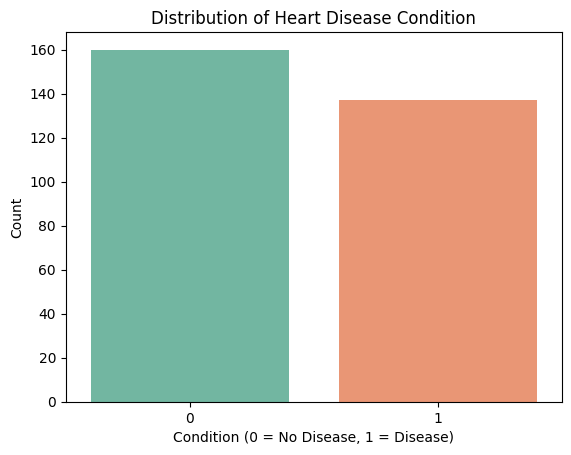

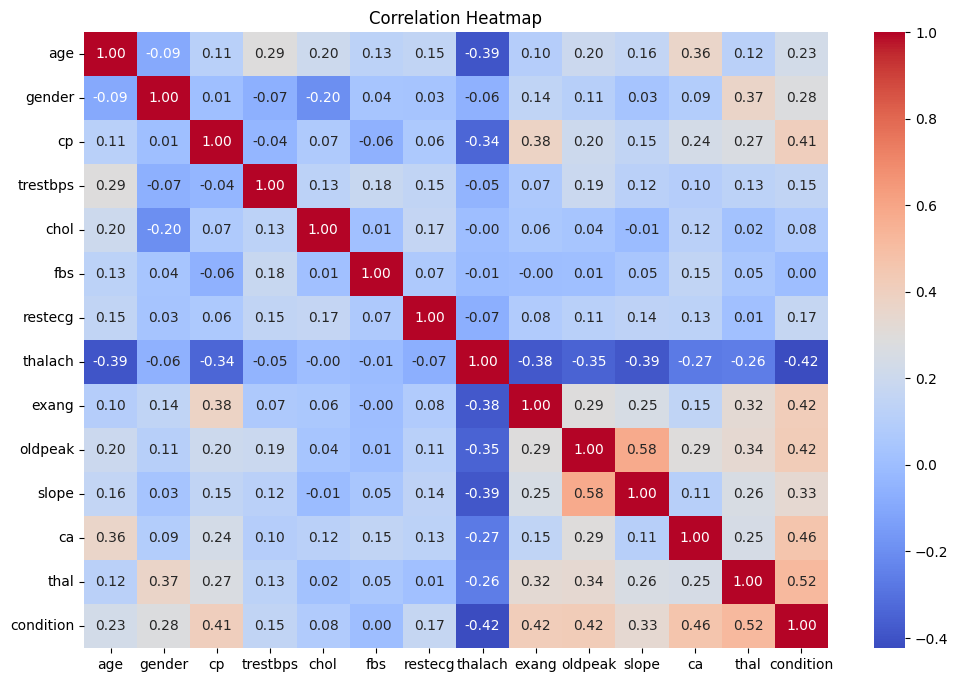

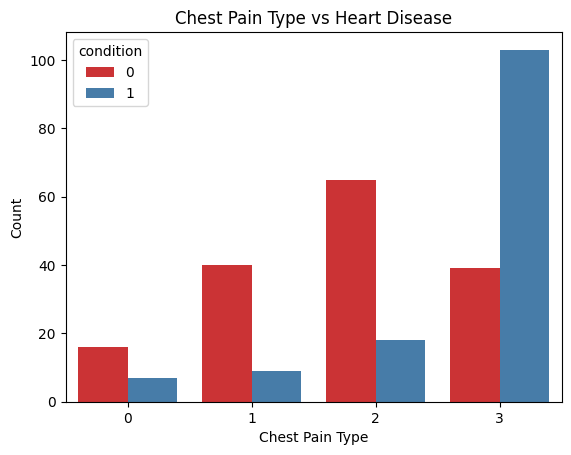

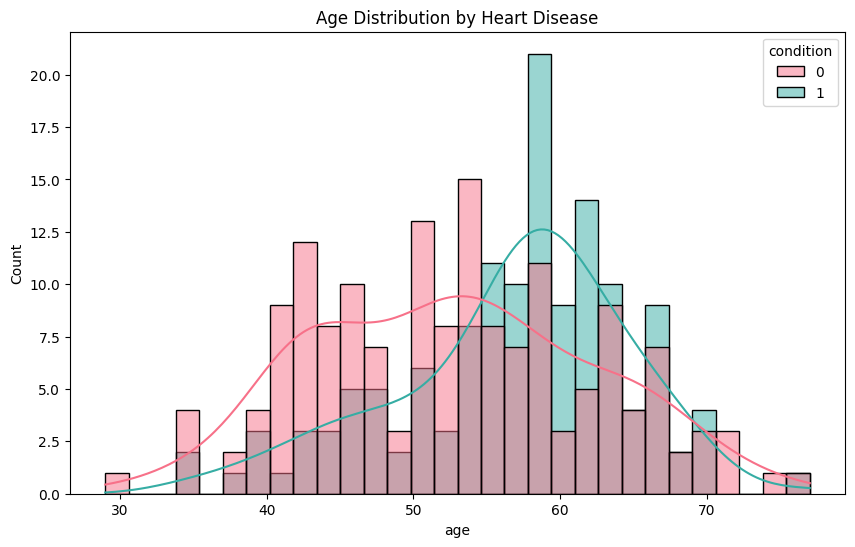

Training Samples: 237
Testing Samples: 60
Accuracy Score: 0.73


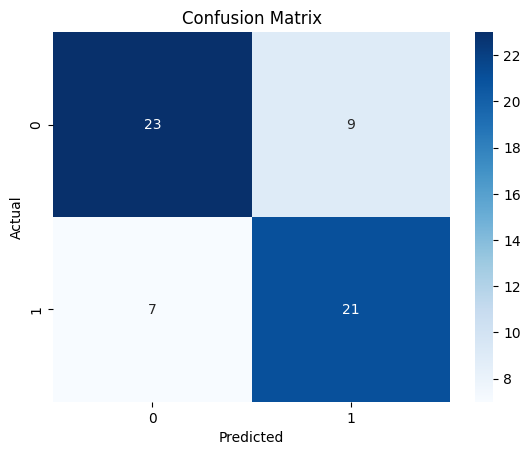

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



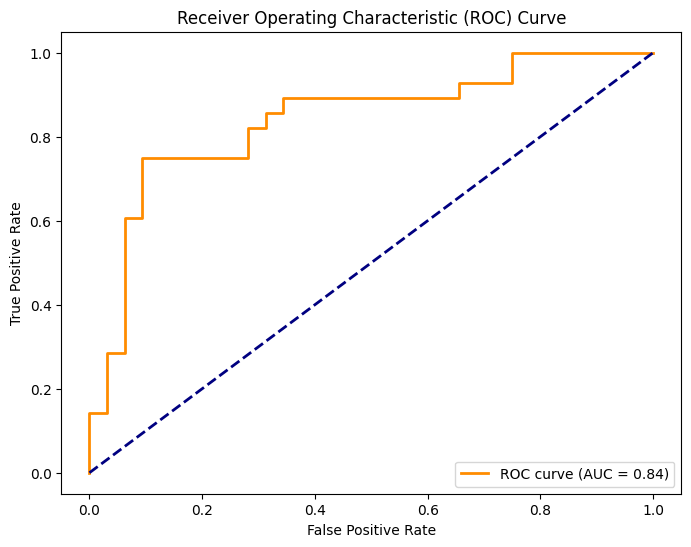

In [7]:
# Step 1: Upload file from your computer
from google.colab import files
uploaded = files.upload()

# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load the dataset (assuming filename is correct)
file_name = list(uploaded.keys())[0]  # get the uploaded file name dynamically
df = pd.read_csv(file_name)

# Step 4: Show the shape and first few rows
print(f"Dataset shape: {df.shape}")
df.head()

# Check basic information of the dataset
df.info()

# Check if there are any missing values
print("\nMissing Values:\n", df.isnull().sum())

# Quick statistics of numerical features
df.describe()

#  Exploratory Data Analysis (EDA

sns.countplot(x='condition', data=df, palette='Set2')
plt.title('Distribution of Heart Disease Condition')
plt.xlabel('Condition (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
# Chest Pain Type (cp) vs Condition
sns.countplot(x='cp', hue='condition', data=df, palette='Set1')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()
# Age Distribution by Condition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='condition', kde=True, bins=30, palette='husl')
plt.title('Age Distribution by Heart Disease')
plt.show()



# Define Features and Target
X = df.drop('condition', axis=1)  # All columns except target
y = df['condition']  # Target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.2f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve and AUC
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [8]:
coefficients = pd.DataFrame({'Feature': df.columns[:-1], 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)


     Feature  Coefficient
11        ca     1.178408
1     gender     0.874545
12      thal     0.744396
3   trestbps     0.528835
9    oldpeak     0.498815
4       chol     0.353759
2         cp     0.352740
8      exang     0.349842
10     slope     0.278713
6    restecg     0.261820
0        age    -0.099137
5        fbs    -0.392838
7    thalach    -0.750473
